<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/mini_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.5.3
!pip install plotly==5.13.0
!pip install sidetable
# !pip install -U kaleido

In [14]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


In [15]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import kaleido
# import sidetable

Existem diversos fatores que os norte-americanos consideram importantes na hora de comprar um imóvel,elenco aqui alguns dos principais:


1. Localização: A localização é muitas vezes considerada a característica mais importante na escolha de um imóvel nos Estados Unidos. As pessoas geralmente procuram por imóveis em bairros seguros e próximos a escolas, comércio, transporte público e outros serviços.

2. Preço: O preço é sempre um fator importante na compra de um imóvel. Os norte-americanos geralmente têm um orçamento definido para sua compra e procuram encontrar a melhor relação entre preço e qualidade.

3. Tamanho: O tamanho da propriedade também é uma consideração importante. As necessidades variam dependendo do tamanho da família e da finalidade do imóvel (por exemplo, se será uma casa para morar ou uma propriedade de investimento).

4. Condição da propriedade: A condição da propriedade é um fator importante na hora de decidir comprar uma casa ou apartamento. As pessoas geralmente preferem imóveis em boas condições, com poucas ou nenhuma reforma necessária.

5. Comodidades: Os norte-americanos também valorizam as comodidades oferecidas pelo imóvel, como ar-condicionado, aquecedores, piscinas, áreas externas, entre outros.

6. História do imóvel: Para alguns compradores, a história do imóvel também pode ser um fator importante na decisão de compra. Isso pode incluir coisas como a idade da propriedade, sua história arquitetônica e sua história como um local importante na comunidade.

8. A localização costeira pode oferecer vistas deslumbrantes, acesso a praias e atividades ao ar livre, além de um estilo de vida tranquilo. No entanto, a proximidade ao mar pode influenciar no preço do imóvel, então os compradores devem estar preparados para pagar um valor mais elevado nesses casos. É importante lembrar que a localização é um fator pessoal e depende das preferências de cada indivíduo ou família que está procurando comprar um imóvel.














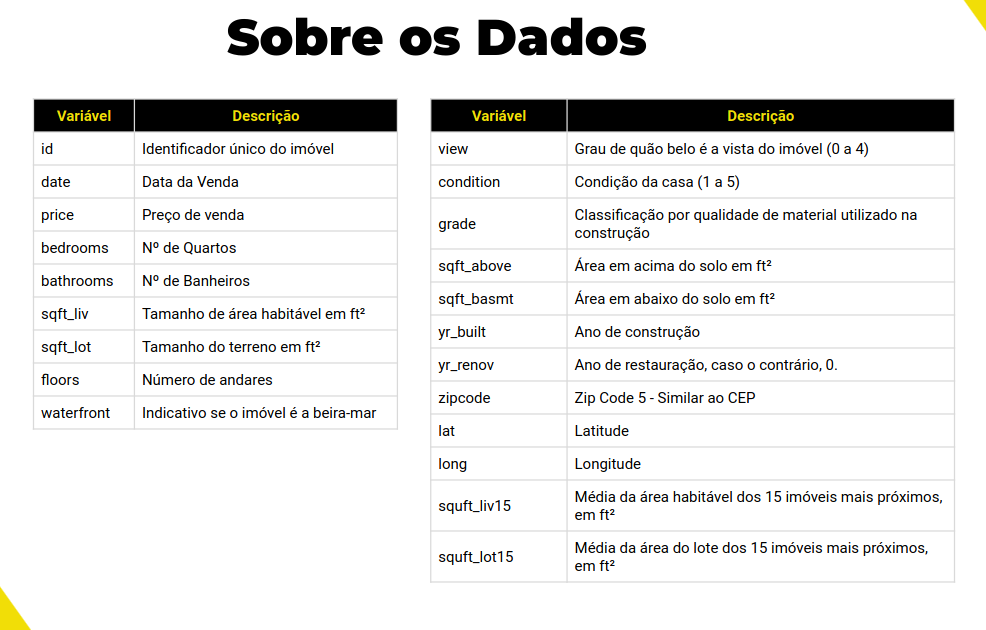

In [5]:
# Busca o dataset direto do meu repositório git
df = pd.read_csv('https://raw.githubusercontent.com/valdirdpg/curso-dnc/master/MODULO-3/kc_house_data.csv')


In [ ]:
# Verificar a consistência dos dados do DataSet:
# Ver se ha valores nulos
if df.isna().any().any():
  print("Existem valores nulos no dataset")
else:
  print("Nao Existem valores nulos no dataset")



Nao Existem valores nulos no dataset


In [ ]:
# Primeira busaca por outliers, observando o desvio padrão de cada atributo 
# compara com média fornecida pelo describe()
df.describe()

,Unnamed: 0,id,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# convertendo alguns atributos para facilitar minha interpretação dos dados
df = df.rename(columns={
    'bedrooms':'num_quarto',
    'bathrooms':'num_banheiro',
    'condition':'condicao_casa_1_5',
    'date':'data_venda',
    'price':'preco_venda',
    'sqft_living':'t_area_habitavel',
    'sqft_lot':'tamanho_terreno',
    'floors':'qtd_andares',
    'waterfront':'imovel_beira_mar',
    'view':'grau_bela_vista',
    'grade':'qualidade_material_const',
    'sqft_above':'area_acima_solo',
    'sqft_basement':'area_baixo_solo',
    'sqft_living15':'media_area_habitavel_15_prox',
    'sqft_lot15':'media_area_terreno_15_prox',
    'yr_built':'ano_construcao',
    'yr_renovated':'ano_reforma',
})

# Criei uma cópia do dataframe para manter a integridade do anterior
house_data = df



In [ ]:
# Busca o nome da cidade pelo zipcode, para na sequencia, adicionar o campo cidade no dataframe
# Este método possibilita buscar uma cidade com maior vantagem para o cliente
zipcode = pd.read_html('https://www.zipcode.com.ng/2022/12/king-county-zip-codes-wa.html')
zipcode = zipcode[1] # tabela 1
zipcode.head()

# inserindo as cidades com base no zip
zipcodes = []
for row in house_data.index:
    indiceZip = np.where(house_data['zipcode'][row] == zipcode['ZIP Code'])[0][0]
    zipcodes.append(zipcode['City'][indiceZip])
    
house_data['cidade'] = zipcodes
del zipcodes

In [ ]:
# Conveter a data para ficar mais legivel e poder operar com mais facilidade
house_data['data_venda'] = pd.to_datetime(house_data['data_venda']).dt.date

# Cria um  dataset com os nomes dos atributos traduzidos para português
# par ajudar na compreensão de cada um
house_data.to_csv('/content/sample_data/house.csv')

In [6]:
# Busca o dataset direto do meu repositório git
house_data = df = pd.read_csv('https://raw.githubusercontent.com/valdirdpg/curso-dnc/master/MODULO-3/MINI-PROJETO/house.csv')
# Removendo a coluna 'Unnamed: 0', criada de forma arbitraria
house_data = house_data.drop('Unnamed: 0',axis=1)
house_data


,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox,cidade
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [ ]:
''' 
  Com base na pesquisa que fiz sobre os interesses dos americanos na hora de comprar imóveis,
  decide procurar imóveis com o seguinte requisitos:
    1 - com vistar para mar
    2 - com bela paisagem - 3 ou 4
    3 - Menor preço - entre 250000 e 1500000
    4 - Maior quantidade de quartos - entre 2 e 4 
    5 - maior quantidade de banheiro entr 1 e 3
    6 - Maior área habitável
    7 - Ano de Construção - preferência acima de 1980 se atender as outras condições
    8 - Ano de Restauração* - Não é muito importante
    9 - Quantidade de andares - entr 1 e 8
    10- Estado de conservação - entre 3 e 5
    11- Maior Avaliação de Material de construção - entre 10 e 13
    12- Local com opçoes de lazer e segurança

    Desta forma devo selecionar as principais colunas que devo buscar respostas
    para as minhas perguntas:
    Quais os imoveis mas conservados, com quantidade comoda de quartos e basn
    heiros
    com bela vista e proximo ao mar que representa o melhor custo beneficio?

'''

In [ ]:
# Com o describe, estou buscando os primeiros outliers
# nesta primeira tomada não vi nada de muito significativo da diferença
# da média para o desvio padrão
house_data.describe()

,id,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,condicao_casa_1_5,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


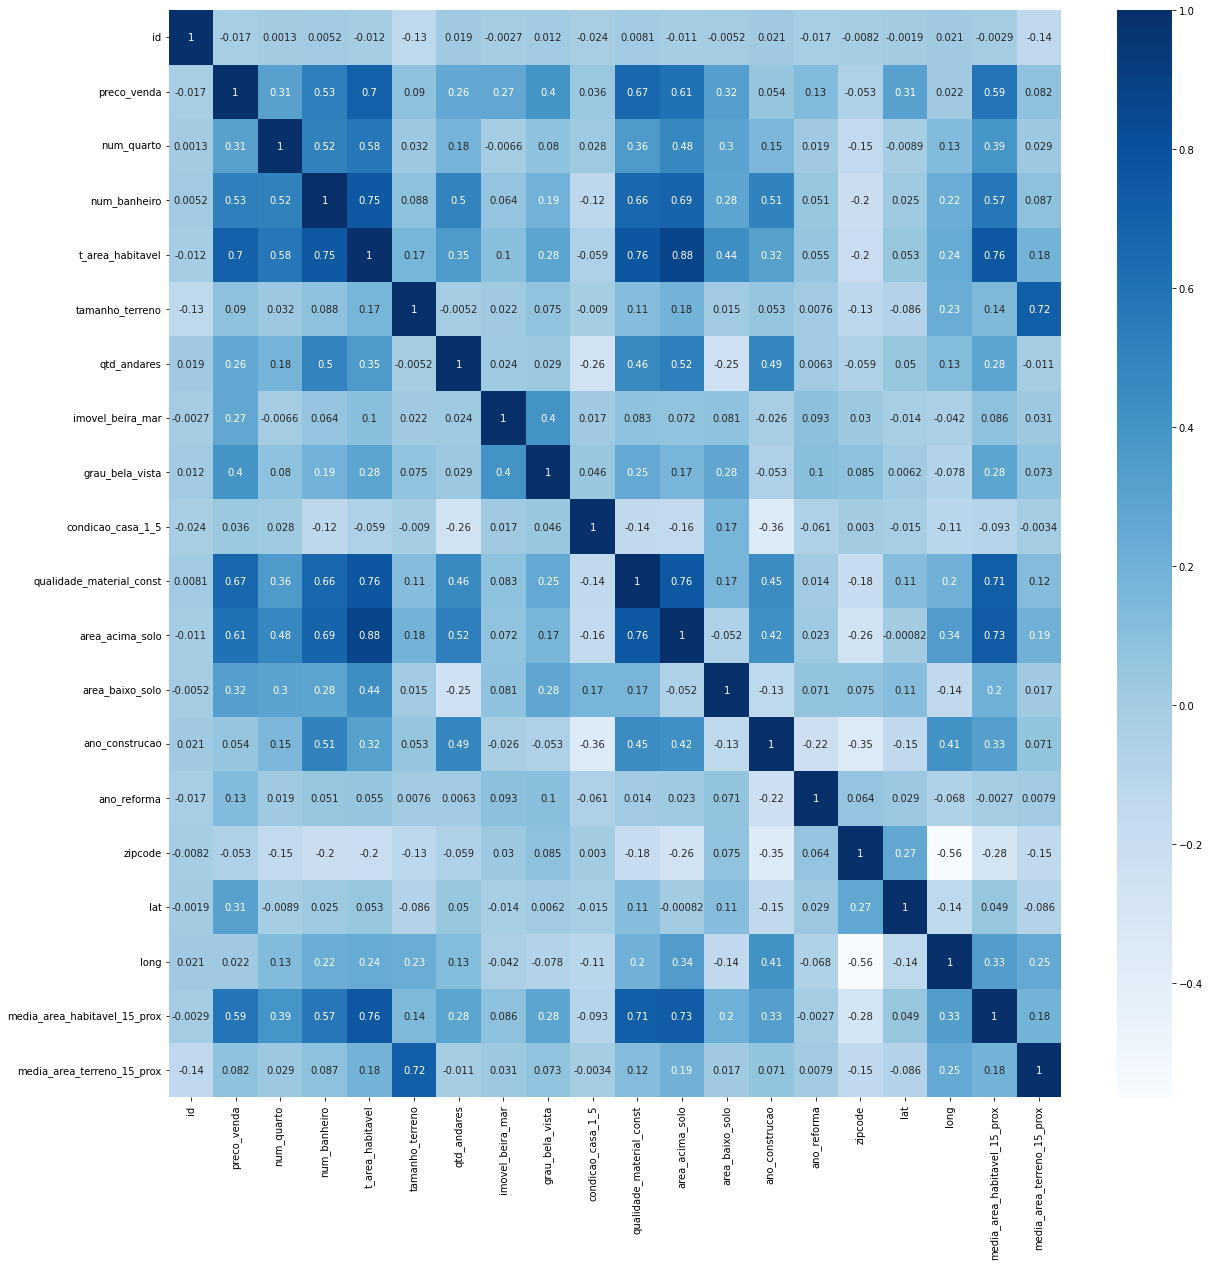

In [ ]:
# Buscando as principais correlações de variáveis que afetam o preço
plt.figure(figsize=(20,20))
correlacao = sns.heatmap(house_data.corr(),annot=True, cmap='Blues');


Existe uma boa realação entre:

*   preço de venda e a qualidade do material utilizado
*   preço de venda e numero de banheiro
*   preço de venda e tamanho de área habitável
*   preço de venda e quantidade de quartos apresenta uma relação menor. - vou testar com o boxplot esta variável
*   achei importante entender que não existe uma relação direta entre tamanho    do terreno e o preço
*   Existem outras realações, mas não interessa para uma análise imediata do problema





In [7]:
# Aqui faço agrupamento dos dados utilizando as principais váriáveis que afetam o preço de venda
agrupa_house = house_data.groupby([
   'preco_venda','qualidade_material_const',        
    'num_banheiro','t_area_habitavel', 'media_area_habitavel_15_prox'            
    
], sort=False).apply(lambda x: x.sort_values(['preco_venda'], ascending=False))

In [ ]:
# Busco compreender a relação entre a quantidade de quartos e preço tendo, observando
# quantos banheiros posseum uma casa com determinada quantidade de quartos.
# apesar da quantidade de quartos não dizer muito sobre o preço, este item é importante 
# para quem buscar a comodidade de uma residência
gboxplot = px.box(agrupa_house,x='num_quarto', y='preco_venda', hover_name='num_banheiro')
gboxplot.show()

In [ ]:
gboxplot.write_html('gboxplot.png')

Neste Gráfico de caixas fica claro que realmente não há uma relação direta entre preço de venda e quantidade de quartos. Há muita discrepância nestas duas variáveis. Tem casas com grande numero de quartos mais baratas do que outras que possuem um número bem menor, aparentemente pode representar alguma vantagem, mas ainda precisa ser comparado com outra variáveis. Se passar o mouse no gráfico do percerber por exemplo que tem casas com 3 quartos com valor mínimo de 82k e máximo de 955k.
Desta forma percebo que outras variáveis afetam este conjunto, e por isso estou construindo filtros com estas váriáveis: 

*   Qualidade do Material usado na construção
*   Número de Banheiros
*   Quantidade de andar
*   Proximidade com praias (Mar)
*   Bo vista da casa
*   Tamanho da área habitável
*   Média de àrea habitável dos 15 imóveis mais próximos








In [ ]:
# No gráfico acima percebe-se um claro outliers no número de quartos e não representa uma oportunidade
house_data[((house_data['num_quarto']>30) | (house_data['num_quarto']>10))]

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox,cidade
8757,1773100755,2014-08-21,520000,11,3.00,3000,4960,2.0,0,0,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,Seattle
15870,2402100895,2014-06-25,640000,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,Seattle


In [8]:
# observando que uma casa com 33 quartos (descobri esta casa com auxilio do Box)
# com um tamanho habitável considerável, custando apenas 640000, chama atenção
# Resta ver o quanto a qualidade do material impacta no preço das casas, já que a qualidade
# do material é baixa (7 de 13), mas o estado da casa é 5, nos padrões americanos isso reprenta:
# Nível 4: A casa está em excelentes condições e pronta para morar, sem necessidade de reparos 
# ou atualizações significativas.
# Nível 5: A casa está em condições excepcionais e tem recursos de alto nível, 
# como acabamentos de luxo, equipamentos modernos e/ou design personalizado.


# Análise do preço em relação a qualidade do material e o estado de conservação do imóvel
gboxplot = px.box(agrupa_house,x='qualidade_material_const', y='preco_venda', hover_name='condicao_casa_1_5')
gboxplot.show()

In [10]:
gboxplot.write_html('gboxplot2.html')

Apesar de alguns valores estarem distante da média geral, percebe-se que quanto maior a qualidade do material, maior é avaliação do imóvel e maior o preço

In [12]:
# Encontrando a media dos preços por região, para identificar 
# a região compreços atrativos.
median_preco = house_data.groupby(['cidade','zipcode']).agg({'preco_venda':'mean'}).reset_index()
median_preco

,cidade,zipcode,preco_venda
0,Auburn,98001,2.808047e+05
1,Auburn,98002,2.342840e+05
2,Auburn,98092,3.349211e+05
3,Bellevue,98004,1.355927e+06
4,Bellevue,98005,8.101649e+05
...,...,...,...
65,Seattle,98199,7.918208e+05
66,Snoqualmie,98065,5.279612e+05
67,Vashon,98070,4.874796e+05
68,Woodinville,98072,5.699585e+05


In [13]:
# Com o histograma construido no plotly, facilitou a observação de concentração de imóveis pela média de preços
# em cada cidade do condado, optei pela média a prncípio, pois me dá a possibilidade de 
# comparar a média de preço por cidade
ghistogram = px.histogram(median_preco, x='preco_venda', color='cidade', title='Gráfico de Média de Preço por Cidade')
ghistogram.show()

In [17]:
ghistogram.write_html('ghistogram.html')

In [ ]:
# Analisando primeiramente Seattle, por ser um grande centro urbano, oferecendo muitas possibilidades
# que atraem os estadunidenses
house_seattle = house_data.loc[house_data.cidade=='Seattle']
agrupa_seattle = house_seattle.groupby(['qualidade_material_const','zipcode']).agg({'preco_venda':'min'}).reset_index()

In [ ]:
# aqui busco onde tem a maior concentração de imóveis com preços atraentes em Seattle
px.histogram(agrupa_seattle,x='preco_venda', color='qualidade_material_const')

In [27]:
# Analisando preços com Histograma com base no ano de construção, que acaba influenciando nos preços
ghistograma = px.histogram(house_data,x='ano_construcao', y='preco_venda',
                          title='Histograma de precos de Imoveis no Condado de Kings')
ghistograma.show()

In [29]:
novo_house = pd.DataFrame(agrupa_house)

In [31]:
# Agrupo os dados pelo ano de construção, buscando encontrar oportunidade em imóveis
# mais novos, mas sem descartar imóveis históricos com boa avaliação
df_ano_construcao = novo_house.groupby(['ano_construcao']).size().reset_index(name='qtd_casa_vendidas')


In [32]:
# Gráfico de barras para ter uma visão mais clara do comportamente de compra de imóveis antigas e novos
gbar = px.bar(df_ano_construcao, y='qtd_casa_vendidas', x='ano_construcao')
gbar.show()

In [34]:
gbar.write_html('gbar.html')

In [36]:
# O número de casas vendidas com ano de construçao inferior a 1980 é relevante
# desta forma não colocarei restrição de busca por ano
soma_casas_1900_1989 = df_ano_construcao[df_ano_construcao.ano_construcao < 1980]
soma_casas_1990_2015 = df_ano_construcao[df_ano_construcao.ano_construcao >= 1980]
print(f'Quantidade de casas vendidas com ano de construção até 1979: {sum(soma_casas_1900_1989.qtd_casa_vendidas)}')
print(f'Quantidade de casas vendidas com ano de construção a partir de 1980: {sum(soma_casas_1990_2015.qtd_casa_vendidas)}')

Quantidade de casas vendidas com ano de construção até 1979: 12334
Quantidade de casas vendidas com ano de construção a partir de 1980: 9279


In [38]:
# Com base em dados do interesse de americanos em imóveis, desenvolvi um filtro
# para buscar oportunidades localizadas nas análises acima
house_filter = novo_house[
    (novo_house.media_area_habitavel_15_prox < 6000) & 
    (novo_house.qualidade_material_const > 7) &
    (novo_house.t_area_habitavel < 6000) & 
    (novo_house.num_banheiro > 1) &
    (novo_house.condicao_casa_1_5 > 3) &
    (novo_house.preco_venda < 2000000) &
    (novo_house.grau_bela_vista > 2) &
    ((novo_house.cidade == 'Seattle')|(novo_house.cidade == 'Kirkland') | (novo_house.cidade == 'Bellevue')| (novo_house.cidade == 'Redmond'))   

  ]
house_filter



,,,,,,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox,cidade
preco_venda,qualidade_material_const,num_banheiro,t_area_habitavel,media_area_habitavel_15_prox,,,,,,,,,,,,,,,,,,,,,,
951000,8,3.25,3250,2960,58,7922800400,2014-08-27,951000,5,3.25,3250,14342,2.0,0,4,...,3250,0,1968,0,98008,47.5880,-122.116,2960,11044,Bellevue
650000,8,2.25,2150,2570,60,1516000055,2014-12-10,650000,3,2.25,2150,21235,1.0,0,3,...,1590,560,1959,0,98166,47.4336,-122.339,2570,18900,Seattle
550000,8,2.00,1970,2390,294,9297300045,2014-07-09,550000,3,2.00,1970,4166,2.0,0,3,...,1270,700,1929,0,98126,47.5717,-122.375,2390,4166,Seattle
1450000,10,3.00,4380,3080,551,1373800295,2014-10-13,1450000,3,3.00,4380,6320,2.0,0,3,...,3580,800,1952,0,98199,47.6452,-122.411,3080,7680,Seattle
865000,8,1.75,1800,2180,673,1959701890,2014-07-29,865000,4,1.75,1800,4180,2.0,0,3,...,1800,0,1921,0,98102,47.6462,-122.318,2180,4620,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879950,9,2.25,3500,2960,19053,9322800210,2014-05-20,879950,4,2.25,3500,13875,1.0,0,4,...,1830,1670,1938,0,98146,47.5083,-122.388,2960,15000,Seattle
1415000,10,3.00,3110,3250,19068,6613001241,2014-08-11,1415000,4,3.00,3110,4408,2.5,0,3,...,2510,600,1931,0,98105,47.6583,-122.270,3250,5669,Seattle
1225000,9,2.25,2020,3100,19468,3271800870,2014-08-07,1225000,4,2.25,2020,5800,1.0,0,3,...,1760,260,1941,0,98199,47.6471,-122.412,3100,5800,Seattle


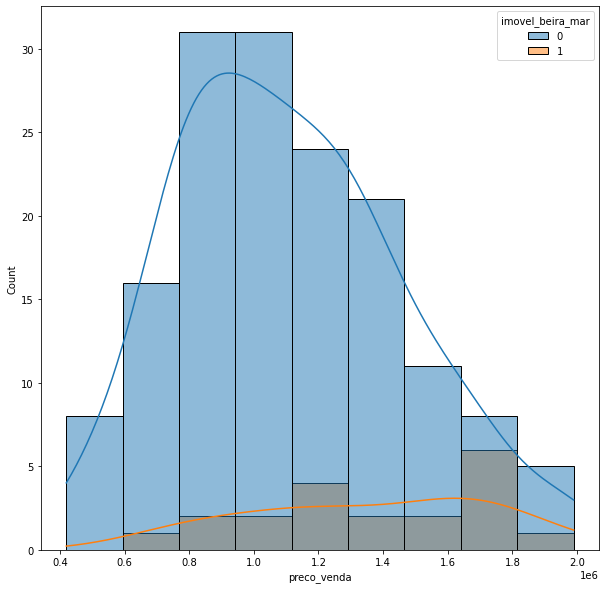

In [ ]:
fig = plt.figure(figsize=(10,10))
ghistograma = sns.histplot(data=house_filter,hue='imovel_beira_mar', x='preco_venda', kde=True)
fig.show()

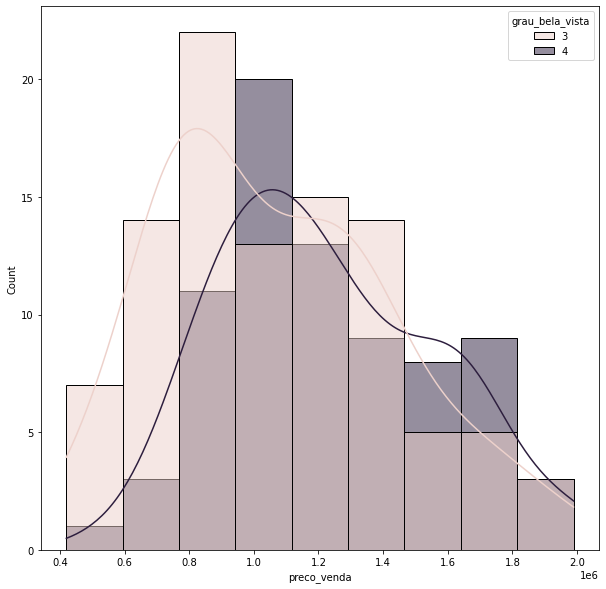

In [ ]:
fig = plt.figure(figsize=(10,10))
ghistograma = sns.histplot(data=house_filter,hue='grau_bela_vista', x='preco_venda', kde=True)
fig.show()

In [ ]:
house_filter.describe()

,id,preco_venda,num_quarto,num_banheiro,t_area_habtavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,condicao_casa_1_5,qualidade_material_const,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habtavel_15_prox,media_area_terreno_15_prox
count,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,3.897384e+09,1.277667e+06,3.500000,2.625000,2855.000000,11166.833333,1.666667,0.166667,3.666667,4.166667,10.0,2453.333333,401.666667,1974.666667,331.833333,98107.500000,47.593950,-122.32400,2724.833333,10491.500000
std,2.865922e+09,2.159784e+05,0.547723,0.518411,105.971694,4690.934253,0.516398,0.408248,0.516398,0.408248,0.0,548.549603,556.432086,12.339638,812.822346,71.662403,0.105306,0.09638,226.009218,2536.014018
min,8.680020e+08,9.950000e+05,3.000000,2.000000,2690.000000,7861.000000,1.000000,0.000000,3.000000,4.000000,10.0,1450.000000,0.000000,1953.000000,0.000000,98006.000000,47.454000,-122.39700,2415.000000,8087.000000
25%,2.845475e+09,1.190000e+06,3.000000,2.312500,2797.500000,8470.000000,1.250000,0.000000,3.250000,4.000000,10.0,2327.500000,15.000000,1971.250000,0.000000,98054.000000,47.517800,-122.38800,2556.000000,8852.500000
50%,3.135451e+09,1.262500e+06,3.500000,2.625000,2870.000000,9220.000000,2.000000,0.000000,4.000000,4.000000,10.0,2610.000000,155.000000,1976.500000,0.000000,98131.500000,47.599600,-122.37900,2767.000000,9762.000000
75%,3.914201e+09,1.313250e+06,4.000000,2.750000,2942.500000,11485.000000,2.000000,0.000000,4.000000,4.000000,10.0,2795.000000,587.500000,1983.250000,0.000000,98161.000000,47.687250,-122.24550,2907.500000,11312.000000
max,9.322800e+09,1.650000e+06,4.000000,3.500000,2960.000000,20240.000000,2.000000,1.000000,4.000000,5.000000,10.0,2960.000000,1400.000000,1987.000000,1991.000000,98177.000000,47.703500,-122.19700,2960.000000,14960.000000


In [ ]:
house_filter.shape

(175, 22)

In [39]:
# Criar grafico de dispersao para verificar a relacao entre preco e tamanho do imóvel e suas tendencias
gdispersao = px.scatter(house_filter, x='t_area_habitavel', 
                        y='preco_venda',color='cidade', hover_name='grau_bela_vista',
                        title='Preco por Tamanho do imovel', log_y=True)
gdispersao.show()

In [40]:
gdispersao.write_html('gdispersao.html')

In [ ]:
qtd_imovel_cidade = house_filter.groupby('cidade').size().reset_index(name='qtd_imovel_cidade')

In [ ]:
gbarras = px.bar(qtd_imovel_cidade, x='cidade', y='qtd_imovel_cidade', title='Numero de imoveis a venda, no condado de KIngs porcidade')
gbarras.show()

In [ ]:

gboxplot = px.box(house_filter, x='cidade', y='preco_venda')
gboxplot.show()

In [ ]:
top_5_indicacao_mar = house_filter[
    
    (house_filter.preco_venda < 800000) &
    
    (house_filter.imovel_beira_mar == 1)   

  ]
top_5_indicacao_mar

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox,cidade
11167,7567600030,2015-01-27,750000,5,1.75,2640,13290,1.0,1,4,...,1400,1240,1954,0,98178,47.5022,-122.223,2400,11942,Seattle
11844,2623039082,2015-02-18,770000,3,3.50,2050,21744,2.0,1,4,...,1750,300,1930,0,98166,47.4536,-122.376,2300,12200,Seattle


In [ ]:
top_5_indicacao_vista = house_filter[
    
    (house_filter.preco_venda < 1500000) &
    (house_filter.ano_construcao >= 1980) &
    (house_filter.imovel_beira_mar == 0) &
    (house_filter.qualidade_material_const > 9)   


  ]
top_5_indicacao_vista.sort_values(['preco_venda','qualidade_material_const'], ascending=[True,False])

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox,cidade
16527,7856640460,2014-12-18,950000,4,2.75,3800,12200,2.0,0,3,...,3800,0,1986,0,98006,47.5689,-122.156,3710,14796,Bellevue
9861,7805450560,2014-08-20,960000,4,2.50,3110,11397,2.0,0,3,...,3110,0,1984,0,98006,47.5623,-122.106,3110,11586,Bellevue
13470,4104500191,2014-05-22,1170000,3,2.75,2890,12130,2.0,0,3,...,2830,60,1987,0,98033,47.6505,-122.203,2415,11538,Kirkland
8328,2600020330,2014-08-13,1218000,4,2.75,3670,15400,2.0,0,3,...,3670,0,1986,0,98006,47.5581,-122.156,3370,13300,Bellevue
13163,9322800230,2014-12-12,1250000,4,2.50,2960,20240,2.0,0,4,...,2960,0,1985,0,98146,47.5075,-122.389,2500,14960,Seattle
13770,1795800040,2014-09-03,1350000,4,3.25,5370,20388,2.0,0,4,...,5370,0,1990,0,98198,47.4050,-122.331,2770,22270,Seattle
18991,7856400300,2014-07-02,1411600,2,2.50,3180,9400,2.0,0,4,...,2610,570,1985,0,98006,47.5617,-122.158,3760,9450,Bellevue
6390,4139430250,2015-03-30,1436000,4,3.50,4970,16582,2.0,0,3,...,3930,1040,1992,0,98006,47.5496,-122.120,3580,13335,Bellevue


In [ ]:
# Imóveis que podem ser um péssimo negócio para se investir
top_5_menos_indicado = novo_house[
    (novo_house.media_area_habitavel_15_prox <= 6000) & 
    (novo_house.qualidade_material_const < 7) &
    (novo_house.t_area_habitavel <= 6000) & 
    (novo_house.num_banheiro > 1) &
    (novo_house.condicao_casa_1_5 < 3) &
    
    ((novo_house.cidade == 'Seattle')|(novo_house.cidade == 'Kirkland') | (novo_house.cidade == 'Bellevue')| (novo_house.cidade == 'Redmond'))   
]
top_5_menos_indicado.sort_values(['preco_venda'], ascending=False)

,id,data_venda,preco_venda,num_quarto,num_banheiro,t_area_habitavel,tamanho_terreno,qtd_andares,imovel_beira_mar,grau_bela_vista,...,area_acima_solo,area_baixo_solo,ano_construcao,ano_reforma,zipcode,lat,long,media_area_habitavel_15_prox,media_area_terreno_15_prox,cidade
12134,2767604170,2015-04-06,975000,3,3.00,1850,5000,1.5,0,0,...,1850,0,1900,0,98107,47.6711,-122.386,1360,2500,Seattle
6694,3331001995,2015-01-23,509990,3,2.00,1440,4859,2.0,0,0,...,1440,0,1921,0,98118,47.5503,-122.285,1360,4558,Seattle
702,6205500030,2014-11-03,480000,4,2.00,2180,10575,1.0,0,0,...,1730,450,1950,0,98005,47.5890,-122.177,2180,12010,Bellevue
8115,1498302783,2014-05-19,333000,4,2.00,1580,7800,2.0,0,0,...,1580,0,1906,0,98144,47.5848,-122.302,1190,4440,Seattle
11327,1900000060,2014-11-17,313000,3,1.50,1550,7260,1.5,0,0,...,1550,0,1925,0,98166,47.4693,-122.349,1190,7620,Seattle
7376,9275200080,2014-11-07,295000,3,1.50,720,7450,1.0,0,1,...,720,0,1924,0,98126,47.5840,-122.375,2600,7360,Seattle
12668,4006000281,2014-07-29,227000,3,1.75,2380,12681,1.0,0,0,...,1380,1000,1918,0,98118,47.5294,-122.279,1720,6377,Seattle
881,2349300060,2015-02-12,200000,4,2.00,1920,4822,1.0,0,0,...,920,1000,1914,0,98136,47.5507,-122.381,1120,4822,Seattle
11995,2724049185,2015-03-25,175000,3,1.75,1430,4920,1.0,0,0,...,1430,0,1957,0,98118,47.5388,-122.275,1550,5646,Seattle
3361,7135300026,2014-12-24,160000,2,2.00,1040,4750,1.0,0,0,...,850,190,1950,0,98118,47.5293,-122.272,1350,5000,Seattle
